In [179]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [180]:
#loading data

df = pd.read_csv('tn.movie_budgets.csv')

In [181]:
#dataset exploration
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [182]:
df.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


The data information shows that there are no missing values.

In [184]:
#changing all the currency values from objects to float

currency_cols = ['production_budget','domestic_gross','worldwide_gross']
for x in currency_cols:
    df[x] = df[x].astype(str).replace({'\$':'',',':''},regex = True)
    df[x] = df[x].astype(float)
    df[x] = df[x].round(0).astype(int)
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,-2147483648
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [185]:
#check for duplicates

df.duplicated().sum()

0

There are no duplicated entries

In [186]:
#dropping rows where gross revenue is 0

df = df[df['worldwide_gross'] != 0]
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,-2147483648
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5775,76,"May 26, 2006",Cavite,7000,70071,71644
5776,77,"Dec 31, 2004",The Mongol King,7000,900,900
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338


In [187]:
#dropping the id column

df = df.drop('id', axis = 1)

In [188]:
#calculating the profit made by each movie
df['profit'] = (df['worldwide_gross'] - df['production_budget']).astype(int)
df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,"Dec 18, 2009",Avatar,425000000,760507625,-2147483648,1722483648
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747
...,...,...,...,...,...,...
5775,"May 26, 2006",Cavite,7000,70071,71644,64644
5776,"Dec 31, 2004",The Mongol King,7000,900,900,-6100
5778,"Apr 2, 1999",Following,6000,48482,240495,234495
5779,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-3662


In [189]:
#checking for outliers based on the profit

Q1 = df['profit'].quantile(0.25)  
Q3 = df['profit'].quantile(0.75)  
IQR = Q3 - Q1  

#outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#outliers
outliers = df[(df['profit'] < lower_bound) | (df['profit'] > upper_bound)]
outliers

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,"Dec 18, 2009",Avatar,425000000,760507625,-2147483648,1722483648
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747
...,...,...,...,...,...,...
5117,"Dec 21, 1937",Snow White and the Seven Dwarfs,1488000,184925486,184925486,183437486
5210,"Nov 21, 1976",Rocky,1000000,117235147,225000000,224000000
5346,"Aug 13, 1942",Bambi,858000,102797000,268000000,267142000
5406,"Jul 14, 1999",The Blair Witch Project,600000,140539099,248300000,247700000


In [190]:
# dropping outliers because they represent one off situations where a movie did really well or very poorly
df_profit = df[(df['profit'] >= lower_bound) & (df['profit'] <= upper_bound)]
df_profit

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
11,"May 25, 2018",Solo: A Star Wars Story,275000000,213767512,393151347,118151347
12,"Jul 2, 2013",The Lone Ranger,275000000,89302115,260002115,-14997885
13,"Mar 9, 2012",John Carter,275000000,73058679,282778100,7778100
23,"Jun 28, 2006",Superman Returns,232000000,200120000,374085065,142085065
31,"May 18, 2012",Battleship,220000000,65233400,313477717,93477717
...,...,...,...,...,...,...
5775,"May 26, 2006",Cavite,7000,70071,71644,64644
5776,"Dec 31, 2004",The Mongol King,7000,900,900,-6100
5778,"Apr 2, 1999",Following,6000,48482,240495,234495
5779,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-3662


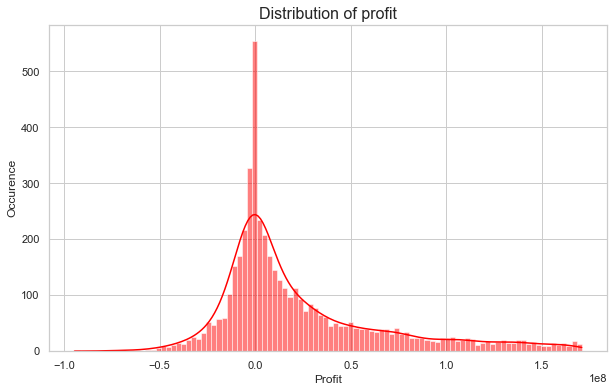

In [191]:
#checking the distribution of values using a histogram plot

plt.figure(figsize = (10, 6))
sns.histplot(data=df_profit, x='profit', bins = 100, color = 'red', kde = True)
plt.title('Distribution of profit', fontsize=16)
plt.xlabel('Profit', fontsize=12)
plt.ylabel('Occurence', fontsize=12)
plt.grid(True)
plt.show()

The distribution appears fairly uniform, though the majority of the values fall toward the right side of the graph. This is a positive indicator as it indicates that more than 50% of movies make profit.

In [192]:
#using median to check for central tendency rather than mean due to the skew;
median_value = np.median(df_profit['profit'])
median_value

6967251.0

The median profit amount is $6,967,251. This suggests that atleast half of the movies in the dataset are making profits above this value. Are there any notable trends that contribute to achieving high profits? First let us find out how the industry has been performing over the decades.

In [197]:
#converting month and date into datetime

df['release_date'] = pd.to_datetime(df['release_date'])
df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,2009-12-18,Avatar,425000000,760507625,-2147483648,1722483648
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747
...,...,...,...,...,...,...
5775,2006-05-26,Cavite,7000,70071,71644,64644
5776,2004-12-31,The Mongol King,7000,900,900,-6100
5778,1999-04-02,Following,6000,48482,240495,234495
5779,2005-07-13,Return to the Land of Wonders,5000,1338,1338,-3662


In [198]:
#extracting months and years from the release date

df['month'] = df['release_date'].dt.month
df['year'] = df['release_date'].dt.year
df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,month,year
0,2009-12-18,Avatar,425000000,760507625,-2147483648,1722483648,12,2009
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,5,2011
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650,6,2019
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,5,2015
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,12,2017
...,...,...,...,...,...,...,...,...
5775,2006-05-26,Cavite,7000,70071,71644,64644,5,2006
5776,2004-12-31,The Mongol King,7000,900,900,-6100,12,2004
5778,1999-04-02,Following,6000,48482,240495,234495,4,1999
5779,2005-07-13,Return to the Land of Wonders,5000,1338,1338,-3662,7,2005


In [199]:
#creating a function for line plotting different parameters

def plot_line(col_name):
    years = df.groupby('year')[col_name].sum().reset_index()

    #visualising the time series
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=years, x='year', y=col_name, marker='o', color = 'red')
    plt.title(f'Year vs {col_name.capitalize()}', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel(col_name.capitalize(), fontsize=12)
    plt.grid(True)
    plt.show()

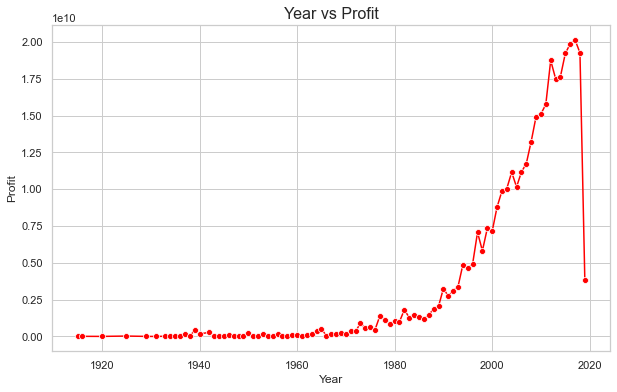

In [200]:
#line plot based on profits

plot_line('profit')

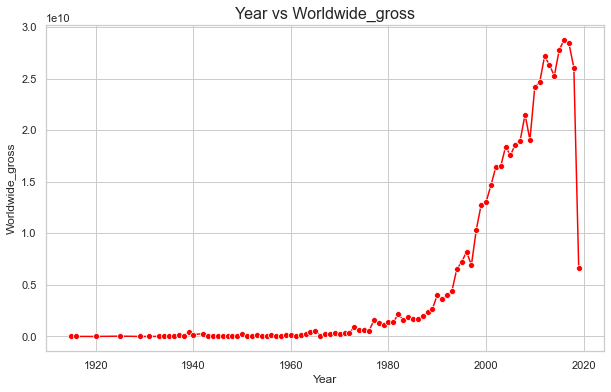

In [201]:
#line plot based on revenue

plot_line('worldwide_gross')

From the above plots, we can observe that the industry has grown increasingly popular from the 1980s through the 21st century. 
This trend shows a rising demand for movies, advancements in production, and the global expansion of the audience base. To solidify our deductions, let us investigate if the production budget increased over the years - rather is there a positive correlation between production budget and years?

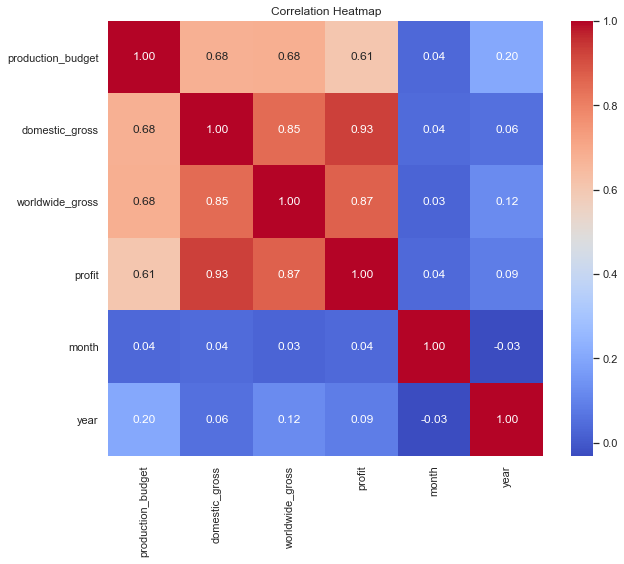

In [202]:
#using a heatmap to check the correlation between different columns

#plotting
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title('Correlation Heatmap')
plt.show()



It is evident that worldwide gross revenue is strongly correlated with the production budget. To explore this further, let's first examine how production budgets have evolved over the years.

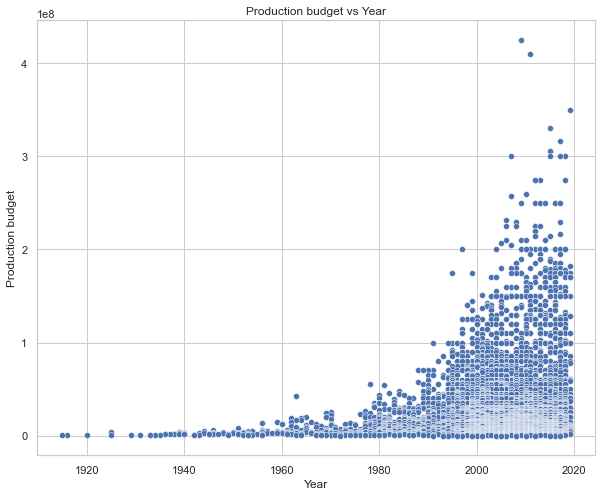

In [203]:
#visualising this correlation using a scatter plot

plt.figure(figsize=(10, 8))

# Scatter plot
sns.scatterplot(x=df['year'], y=df['production_budget'])

# Labels and Title
plt.xlabel("Year")
plt.ylabel("Production budget")
plt.title("Production budget vs Year")

# Show the plot
plt.show()

We can clearly see that the production budget has been increasing over the years. This is may be because of the demand for high-quality visual effects and the continually advancing technology. With this insight, we can ask: Do higher production budgets result in higher revenue? Have the majority of movies with a high production budget accrued good revenue? Using a linear regression, we can be able to determine how much variance in the revenue can be accredited to the production budget.

In [205]:
#creating a function for doing regressions

def regression(a,b):
#defining variables

    X = df[a]
    y = df[b]

    #adding constant

    model = sm.OLS(endog = y, exog = sm.add_constant(X))

    #fitting

    results = model.fit()

    #evaluation of the results
    print(results.summary())

In [172]:
#regression between production_budget and r_o_i
regression(['production_budget'], 'worldwide_gross')

                            OLS Regression Results                            
Dep. Variable:        worldwide_gross   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     4774.
Date:                Sat, 25 Jan 2025   Prob (F-statistic):               0.00
Time:                        13:11:50   Log-Likelihood:            -1.0884e+05
No. Observations:                5415   AIC:                         2.177e+05
Df Residuals:                    5413   BIC:                         2.177e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4.186e+05   2.24e+0

Interpretation of the simple regression:
1. R-squared = 0.579 meaning that the variance of the revenue can be explained by the production budget 58% of the time. This shows there is a strong relationship between production budget and worldwide gross.
2. p-value =  0.00 which is less than 0.05 meaning that the model is statistically significant.
3. constant = -1.516e+07 means that when production budget is 0, estimated value of the revenue is -1.516e+07
4. coef = 2.9467 suggests that for every unit increase in the production budget, revenue increases by 2.9467 units.

The model confirms that higher production budgets are strongly associated with higher worldwide gross revenues. On average, every dollar spent on production results in an additional $2.95 in gross revenue.

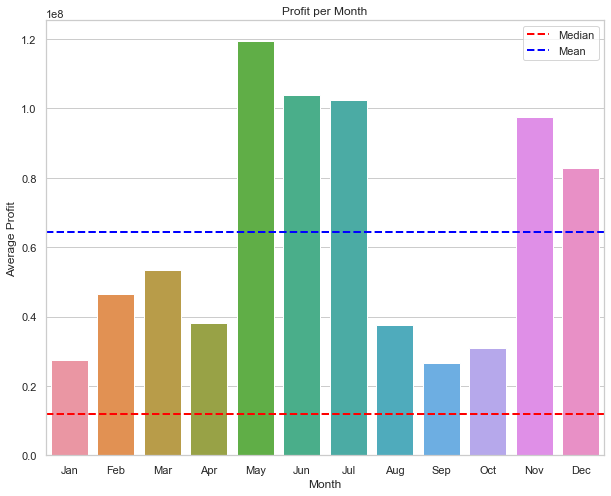

In [173]:
profit_per_month = df.groupby('month')['profit'].mean().reset_index()

plt.figure(figsize=(10, 8))

# Bar plot
sns.barplot(x=profit_per_month['month'], y=profit_per_month['profit'])

# Labels and Title
plt.xlabel("Month")
plt.ylabel("Average Profit")
plt.title("Profit per Month")
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

#adding the line of central tendency
mean_value = np.mean(df['profit'])
plt.axhline(median_value, color='red', linestyle='dashed', linewidth=2, label = 'Median')
plt.axhline(mean_value, color='blue', linestyle='dashed', linewidth=2, label = 'Mean')
plt.legend()

# Show the plot
plt.show()



The industry appears to perform better than average in February, June, July, November and December. Therefore, it may be advisable for the client to schedule their release dates during these months to maximize potential returns.

What percentage of the worldwide gross is foreign gross?

In [174]:
#adding column for foerign gross

df['foreign_gross'] = df['worldwide_gross'] - df['domestic_gross']
df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,month,year,foreign_gross
0,2009-12-18,Avatar,425000000,760507625,-2147483648,1722483648,12,2009,1386976023
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,5,2011,804600000
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650,6,2019,107000000
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,5,2015,944008095
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,12,2017,696540365
...,...,...,...,...,...,...,...,...,...
5775,2006-05-26,Cavite,7000,70071,71644,64644,5,2006,1573
5776,2004-12-31,The Mongol King,7000,900,900,-6100,12,2004,0
5778,1999-04-02,Following,6000,48482,240495,234495,4,1999,192013
5779,2005-07-13,Return to the Land of Wonders,5000,1338,1338,-3662,7,2005,0


In [175]:
#dropping rows where foreign gross is 0 to get rid of movies that did not make it to the foreign market

foreign_df = df[df['foreign_gross'] != 0]
foreign_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,month,year,foreign_gross
0,2009-12-18,Avatar,425000000,760507625,-2147483648,1722483648,12,2009,1386976023
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,5,2011,804600000
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650,6,2019,107000000
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,5,2015,944008095
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,12,2017,696540365
...,...,...,...,...,...,...,...,...,...
5759,2006-06-02,The Puffy Chair,15000,194523,195254,180254,6,2006,731
5773,1993-02-26,El Mariachi,7000,2040920,2041928,2034928,2,1993,1008
5774,2004-10-08,Primer,7000,424760,841926,834926,10,2004,417166
5775,2006-05-26,Cavite,7000,70071,71644,64644,5,2006,1573


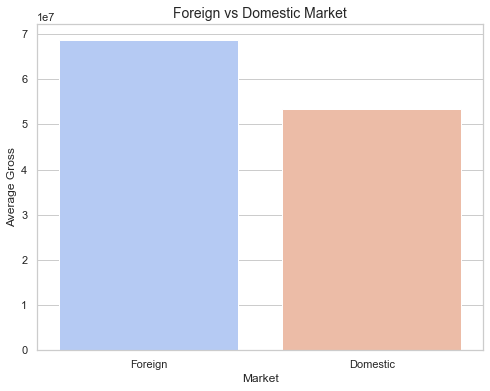

In [176]:
#visualising the comparison between the domestic and foerign market

average_foreign = foreign_df['foreign_gross'].mean()
average_domestic = foreign_df['domestic_gross'].mean()

#creating a dataframe for the purposes of plotting
avg_data = pd.DataFrame({
    'Market': ['Foreign', 'Domestic'],
    'Average Gross': [average_foreign, average_domestic]
})

#plotting
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_data, x='Market', y='Average Gross', palette = 'coolwarm',)
plt.title('Foreign vs Domestic Market', fontsize=14)
plt.xlabel('Market', fontsize=12)
plt.ylabel('Average Gross', fontsize=12)
plt.show()